In [1]:
import numpy as np
unnormWFs = np.load("full_data.npy")

In [2]:
import sklearn.preprocessing
normWFs = sklearn.preprocessing.normalize(unnormWFs,norm = 'max')

In [3]:
import os
import random

RAND_STATE = 42
np.random.seed(RAND_STATE)
os.environ['PYTHONHASHSEED'] = str(RAND_STATE)
random.seed(RAND_STATE)

In [4]:
from umap import umap_ as umap
reducer = umap.UMAP()
mapper = reducer.fit(normWFs)

C:\Users\jlama\anaconda3\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\jlama\anaconda3\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\jlama\anaconda3\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [7]:
import networkx as nx
G = nx.from_scipy_sparse_array(mapper.graph_)

AttributeError: module 'networkx' has no attribute 'from_scipy_sparse_array'

In [8]:
import cylouvain
clustering = cylouvain.best_partition(G)
clustering_solution = list(clustering.values())

ModuleNotFoundError: No module named 'cylouvain'

In [6]:
embedding = reducer.fit_transform(normWFs)

import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt

umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution
f,arr = plt.subplots(1);
arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o', c=umap_df['cluster_id'].tolist(),cmap='turbo')

NameError: name 'clustering_solution' is not defined

In [23]:
corners = np.array([
    [-2, 11],  # top-left
    [12, 11],  # top-right
    [-2, 0],  # bottom-left
    [12, 0],  # bottom-right
])

In [24]:
test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)])

In [25]:
inv_transformed_points = reducer.inverse_transform(test_pts)

NameError: name 'cluster_id' is not defined

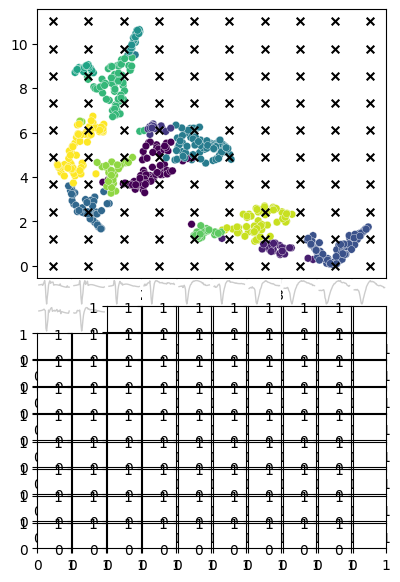

In [35]:
from matplotlib.gridspec import GridSpec

def find_nearest_color(embedding, test_coord, threshold_dist=0.5):
    x_array, y_array = embedding[:,0], embedding[:,1]
    
    # Take coordinates of test point to calculate an array of each point's distance to test then return index
    # where the minimum value is found
    dist_array = np.array(np.abs(x_array-test_coord[0])+np.abs(y_array-test_coord[1]))
    idx = dist_array.argmin()
    
    if dist_array[idx] <= threshold_dist:
        return cluster_id[idx]
    
    else:
        return (0.8,0.8,0.8)
    
fig = plt.figure(figsize=(4.5,7))
gs = GridSpec(20, 10, fig)
gs.update(wspace=0.05, hspace=0.05)
scatter_ax = fig.add_subplot(gs[:10, :10])
waveform_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        waveform_axes[i, j] = fig.add_subplot(gs[10+ i,j])

scatter_ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1],
                c=umap_df['cluster_id'], s=30,linewidth=0.25,edgecolor='white',zorder=1)
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', 
                   c='k',
                   s=30, zorder=2, alpha=1)

# Plot each of the generated waveforms
for i in range(10):
    for j in range(10):
        waveform_axes[i, j].plot(inv_transformed_points[i*10 + j], 
                                     c = find_nearest_color(reducer.embedding_,
                                                            test_pts[i*10 + j]),
                                linewidth=1.0)
            
        waveform_axes[i, j].set(xticks=[], yticks=[])
        waveform_axes[i, j].spines['right'].set_visible(False)
        waveform_axes[i, j].spines['top'].set_visible(False)
        waveform_axes[i, j].spines['left'].set_visible(False)
        waveform_axes[i, j].spines['bottom'].set_visible(False)
        
scatter_ax.set(xticks=[], yticks=[])
scatter_ax.spines['right'].set_visible(False)
scatter_ax.spines['top'].set_visible(False)
scatter_ax.spines['left'].set_visible(False)
scatter_ax.spines['bottom'].set_visible(False)